In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_folder = "real_world_data"
# Load csv files
case_file = data_folder + "/" + "case_data.csv"
population_file = data_folder + "/" + "population_data.csv"
vaccine_file = data_folder + "/" + "vaccine_data.csv"

# Load data from csv files into numpy arrays
case_data = np.loadtxt(case_file, delimiter=",", skiprows=1)
population_data = np.loadtxt(population_file, delimiter=",", skiprows=1)
vaccine_data = np.loadtxt(vaccine_file, delimiter=",", skiprows=1)
case_data = np.transpose(case_data)

# Some constants for the model
alpha = 0.1 # Hospitalization rate for non-vaccinated
beta = 0.02 ;# Hospitalization rate for vaccinated 
gamma = 0.1 # State can only vaccinate 10% of population per week



In [14]:
# Solution Filename 
filename = "solution_real_double_dose.jld"
baseline_name = "solution_equity_double_dose.jld"
def load_solution(filename):
    # Load multiple arrays from the JLD2 file
    with h5py.File(filename, "r") as file:
        # Access the arrays using the names used during saving ("X", "Y", "Z" in this case)
        X = np.array(file["X_soln"])
        Y = np.array(file["Y_soln"])
        W = np.array(file["W_soln"])

    # Now you can use X, Y, and Z in Python
    X = np.transpose(X) 
    Y = np.transpose(Y)
    W = np.transpose(W)
    return X, Y, W

X, Y, W = load_solution(filename)
X_baseline, Y_baseline, W_baseline = load_solution(baseline_name)

print(W.shape)

(50, 52, 2)


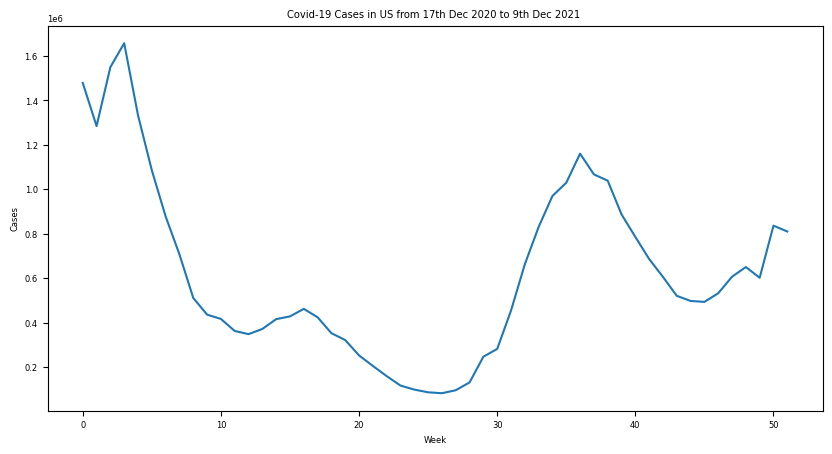

In [29]:
summed_case_data = np.sum(case_data, axis=0) 
# total population 
total_population = np.sum(population_data)
#plot the data
plt.figure(figsize=(10, 5))
# add marker to the plot
plt.plot(summed_case_data, label="Data") 
plt.xlabel("Week")
plt.ylabel("Cases")
# Make title font bigger
plt.title("Covid-19 Cases in US from 17th Dec 2020 to 9th Dec 2021 ") 
plt.show()


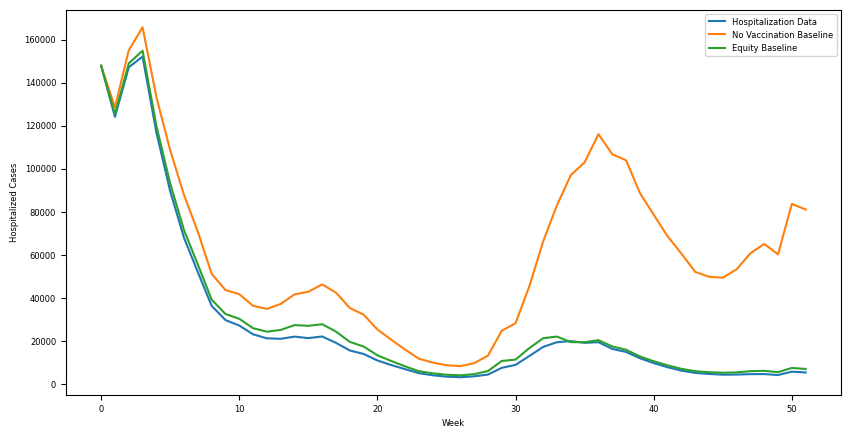

In [23]:
summed_hospitalization_data = np.sum(Y, axis=0) 

no_vaccination_baseline = alpha*np.sum(case_data, axis=0) 
equity_baseline = np.sum(Y_baseline, axis=0) 

#plot the data
plt.figure(figsize=(10, 5))
plt.plot(summed_hospitalization_data, label="Hospitalization Data")
plt.plot(no_vaccination_baseline, label="No Vaccination Baseline")
plt.plot(equity_baseline, label="Equity Baseline") 
plt.xlabel("Week")
plt.ylabel("Hospitalized Cases")
plt.legend()
plt.show()


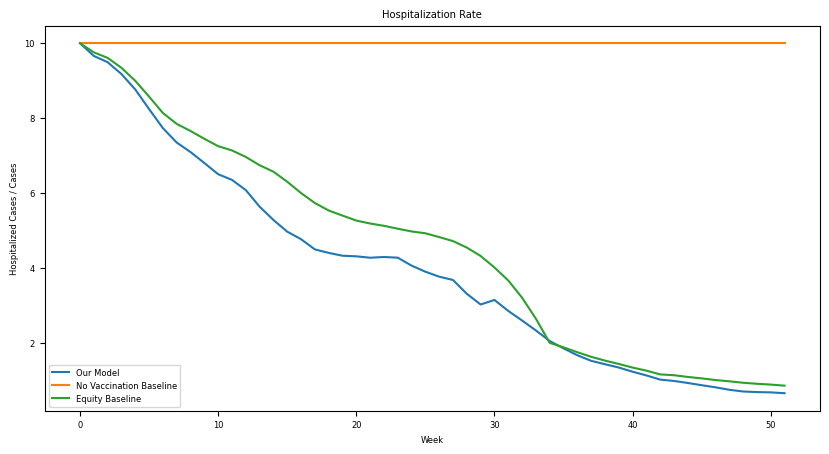

In [18]:
summed_case_data = np.sum(case_data, axis=0) 
summed_hospitalization_data = np.sum(Y, axis=0)  
# divide elementwise
ratio =100*summed_hospitalization_data / summed_case_data 
baseline_hosp_data = np.sum(Y_baseline, axis=0) 
ratio_baseline = 100*baseline_hosp_data / summed_case_data 
no_hosp_ratio = alpha *100
# plot the ratio 
plt.figure(figsize=(10, 5))
plt.plot(ratio, label="Our Model")
plt.plot(no_hosp_ratio*np.ones(len(ratio)), label="No Vaccination Baseline")
plt.plot(ratio_baseline, label="Equity Baseline") 
plt.xlabel("Week")
plt.ylabel("Hospitalized Cases / Cases")
plt.title("Hospitalization Rate")
plt.legend()
plt.show()


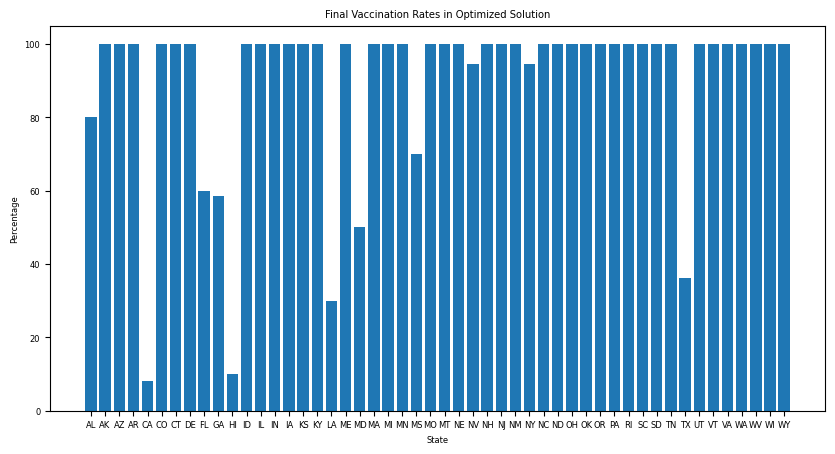

In [31]:
# Final Full vaccination rates 
final_vaccination_rates = 100*W[:,-1,1] 
state_list = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
        ] 
# plot the data in a bar chart
#reduce font size of x ticks
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(10, 5))
plt.bar(state_list, final_vaccination_rates)
plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Final Vaccination Rates in Optimized Solution")
plt.show()



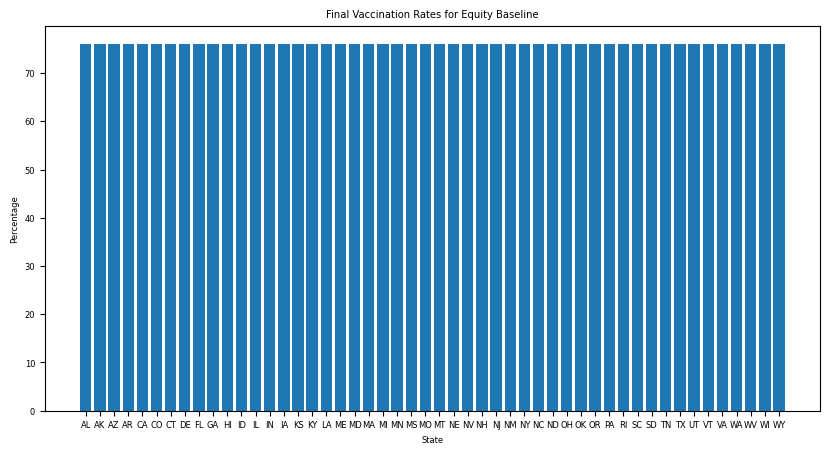

In [32]:
# Final Full vaccination rates 
final_vaccination_rates = 100*W_baseline[:,-1,1] 
state_list = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
        ] 
# plot the data in a bar chart
#reduce font size of x ticks
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(10, 5))
plt.bar(state_list, final_vaccination_rates)
plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Final Vaccination Rates for Equity Baseline")
plt.show()



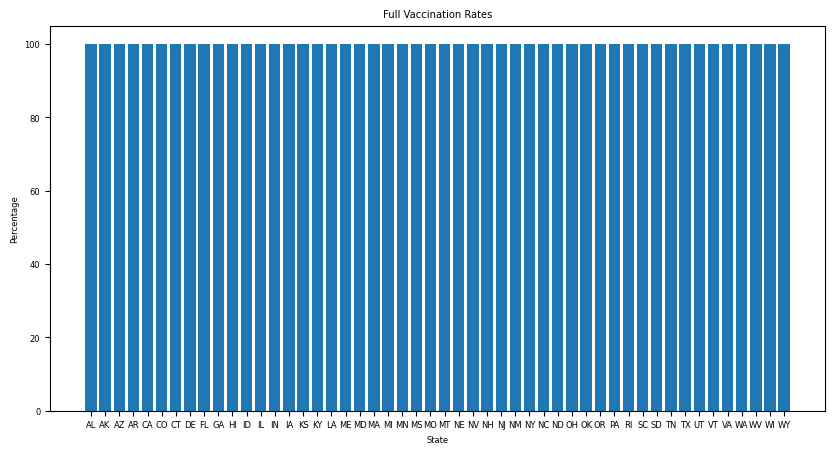

In [11]:
# Single Dose vaccination rates 
single_dose_rate = 100*W[:,-1,0] 
state_list = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
        ] 
# plot the data in a bar chart
#reduce font size of x ticks
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(10, 5))
plt.bar(state_list, single_dose_rate)
plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Full Vaccination Rates")
plt.show()

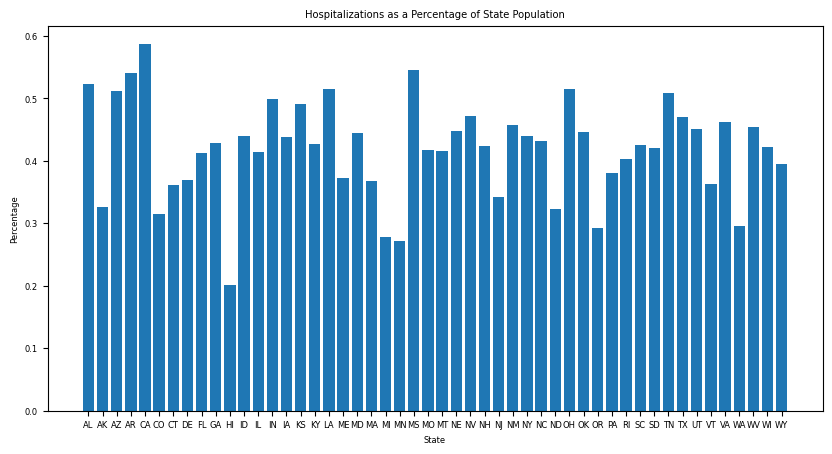

In [12]:
# hospitalizations per state as a percentage of state population 
state_hosp = np.sum(Y, axis=1)
for i in range(len(state_hosp)):
    state_hosp[i] = 100*state_hosp[i]/population_data[i]
# plot the data in a bar chart
#reduce font size of x ticks
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(10, 5))
plt.bar(state_list, state_hosp)
plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Hospitalizations as a Percentage of State Population")
plt.show()

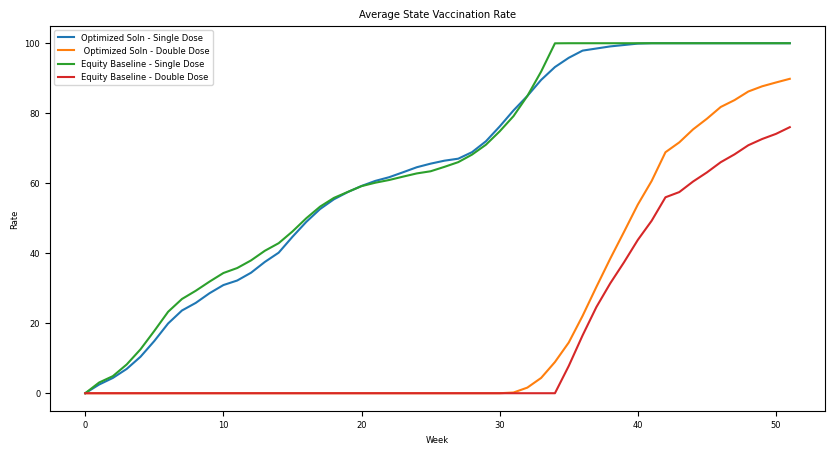

In [37]:
# vaccination rate as an average across states over time
single_vaccinated_average = np.average(W[:,:,0], axis=0) * 100
double_vaccinated_average = np.average(W[:,:,1], axis=0) * 100 
baseline_single_vaccinated_average = np.average(W_baseline[:,:,0], axis=0) * 100
baseline_double_vaccinated_average = np.average(W_baseline[:,:,1], axis=0) * 100
plt.figure(figsize=(10, 5))
plt.plot(single_vaccinated_average, label="Optimized Soln - Single Dose")
plt.plot(double_vaccinated_average, label=" Optimized Soln - Double Dose")
plt.plot(baseline_single_vaccinated_average, label="Equity Baseline - Single Dose")
plt.plot(baseline_double_vaccinated_average, label="Equity Baseline - Double Dose")
plt.xlabel("Week")
plt.ylabel("Rate")
plt.title("Average State Vaccination Rate")
plt.legend()
plt.show()